### Importing Libraries

In [2]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices())

### Labeling Dataset based on the Directory Names

In [1]:
datasetDir = 'Dataset'

# get the Subdirectory of the Dataset Folder
for root, folder, files in os.walk(datasetDir):
    if folder != []:
        listDir = folder

classes = []
# retrieve the name and the number of the classification
for i, category in enumerate(listDir):
    # print(category)
    classes.append(category)
    # classes.append({'name' : category,'id' : i + 1, "category" : category})
classes

['Bag',
 'Book',
 'Chair',
 'Cup',
 'Eraser',
 'Fork',
 'Pen',
 'Pencil',
 'Pencil Case',
 'Plate',
 'Soap',
 'Spoon',
 'Table',
 'Toothbrush',
 'Toothpaste']

### Import Dataset

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Create a datagen that is split the dataset into 80% Train and 20% Test
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

val_datagen = ImageDataGenerator(
     rescale=1./255,
     validation_split=0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Training Set
training_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="training",
    batch_size=32
)

# Validation Set
validation_set = val_datagen.flow_from_directory(
    datasetDir,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="validation",
    batch_size=32
)

test_set = test_datagen.flow_from_directory(
    'Test Set',
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 2485 images belonging to 15 classes.
Found 613 images belonging to 15 classes.
Found 291 images belonging to 15 classes.


In [5]:
from datetime import datetime

now = datetime.now()
date_string = now.strftime('%d-%m-%Y-%H-%M-%S')

In [6]:
model_type = 'MobileNet-Adadelta-0.01'
ckpt_path =f"{model_type}\\Checkpoints\\" + model_type + "\\checkpoint_" + date_string +"_{accuracy:.3f}.hdf5"
log_path = f"Logs\\" + model_type + "-training_log.csv"

In [7]:
callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint(
        ckpt_path,
        monitor='val_accuracy',
        save_best_only=True,
        save_freq='epoch',
        mode='max',
        verbose=1,
    ),
    # tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=10,
    #     mode='min',
    #     verbose=1
    # ),
    tf.keras.callbacks.CSVLogger(
        log_path,
        separator=',',
        append=True
    )
]

### Build Model

In [8]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32 , kernel_size=(3, 3) , strides=2, input_shape=(224,224,3),padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #1st Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #2nd Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=2 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(128, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #3rd Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1, padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(128, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #4th Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=2 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(256, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #5th Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1, padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(256, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #6th Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=2 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #Five Fold (7th Stage))
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(512, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #8th Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=2 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(1024, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     #9th Stage
     tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3) , strides=1 , padding='same', activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(1024, kernel_size=(1, 1), strides= 1, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     

     #Average Pool
     tf.keras.layers.AveragePooling2D(pool_size=(7, 7) , strides=1, data_format='channels_first'),

     #Flatten
     tf.keras.layers.Flatten(),
     
     # tf.keras.layers.Dense(1000 , activation='relu'),
     #Output Layer
     tf.keras.layers.Dense(len(classes) , activation='softmax')
])


In [9]:
# model.summary()

### Compile the Model

In [10]:


model.compile(
    optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01) , 
    loss='categorical_crossentropy', 
    metrics=['accuracy'],

)

### Train The Model

In [11]:
# # ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. 
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# # EarlyStopping helps us to stop the training of the model early if there is no increase in the parameter which I have set to monitor in EarlyStopping. 
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit(training_set, epochs=200, verbose=1 ,validation_data=validation_set , batch_size=32, callbacks=callbacks, shuffle=True)

Epoch 1/200
43/78 [===============>..............] - ETA: 33s - loss: 2.7026 - accuracy: 0.1010

c:\Users\Vedro Suwandi\Python\Python3.8\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


78/78 [==============================] - ETA: 0s - loss: 2.6849 - accuracy: 0.1050
Epoch 1: val_accuracy improved from -inf to 0.06199, saving model to MobileNet-Adadelta-0.01\Checkpoints\MobileNet-Adadelta-0.01\checkpoint_10-06-2022-12-51-53_0.105.hdf5
78/78 [==============================] - 109s 1s/step - loss: 2.6849 - accuracy: 0.1050 - val_loss: 2.7232 - val_accuracy: 0.0620
Epoch 2/200
78/78 [==============================] - ETA: 0s - loss: 2.6266 - accuracy: 0.1336
Epoch 2: val_accuracy improved from 0.06199 to 0.08809, saving model to MobileNet-Adadelta-0.01\Checkpoints\MobileNet-Adadelta-0.01\checkpoint_10-06-2022-12-51-53_0.134.hdf5
78/78 [==============================] - 103s 1s/step - loss: 2.6266 - accuracy: 0.1336 - val_loss: 2.7720 - val_accuracy: 0.0881
Epoch 3/200
78/78 [==============================] - ETA: 0s - loss: 2.5809 - accuracy: 0.1529
Epoch 3: val_accuracy did not improve from 0.08809
78/78 [==============================] - 111s 1s/step - loss: 2.5809 - 

### Visualize Loss between the Training and Test

In [12]:
import pandas as pd

csv = pd.read_csv(log_path)

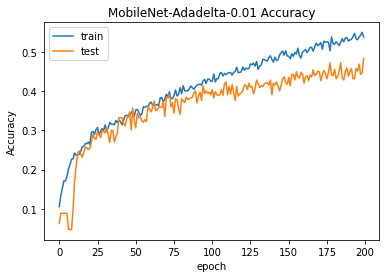

In [13]:
# summarize history for Accuracy
plt.plot(csv['accuracy'])
plt.plot(csv['val_accuracy'])
plt.title(f'{model_type} Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualize Accuracy between the Training and Test

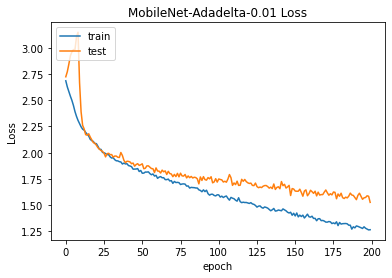

In [14]:
# summarize history for accuracy
plt.plot(csv['loss'])
plt.plot(csv['val_loss'])
plt.title(f'{model_type} Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save(f'Model\\{model_type}ImageClassification.h5'.format(model_type))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 depthwise_conv2d (Depthwise  (None, 112, 112, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      2112      
                                                        

: 